# Tyler's Capstone Scratchpad

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import acquire
import prepare
import explore
import tyler_explore
import tyler_wrangle
from datetime import datetime
import os

In [2]:
# df = acquire.get_survey_data('survey.csv')

In [3]:
# df.info()

In [4]:
# strings_df = prepare.prep_the_strings(df)
# strings_df.info()

In [5]:
# encode_df = prepare.prep_encode(strings_df)
# encode_df.info()

In [6]:
# encode_df.work_interfere.value_counts()

In [7]:
# testing wrangle functions...
df = tyler_wrangle.get_survey_data('survey.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [8]:
strings_df = tyler_wrangle.prep_the_strings(df)
encoded_df = tyler_wrangle.prep_encode(strings_df)

In [9]:
strings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    object        
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    int64         
 5   family_history             957 non-null    int64         
 6   treatment                  957 non-null    int64         
 7   work_interfere             957 non-null    object        
 8   no_employees               957 non-null    int64         
 9   remote_work                957 non-null    int64         
 10  tech_company               957 non-null    int64         
 11  benefits                   957 non-null    int64         
 12  care_op

In [10]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    int64         
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    int64         
 5   family_history             957 non-null    int64         
 6   treatment                  957 non-null    int64         
 7   work_interfere             957 non-null    int64         
 8   company_size               957 non-null    int64         
 9   remote_work                957 non-null    int64         
 10  tech_company               957 non-null    int64         
 11  benefits                   957 non-null    int64         
 12  care_op

## Data Exploration

### Boolean Variables:
- 'self_employed'
- 'family_history'
- 'remote_work'
- 'tech_company'
- 'obs_consequence'

In [11]:
# first let's split the data...

train, validate, test = explore.train_validate_test_split(encoded_df, 'work_interfere')

In [12]:
train.shape, validate.shape, test.shape

((535, 25), (230, 25), (192, 25))

In [13]:
# cat_vars, quant_vars = explore.cat_vs_quant(train)

In [14]:
# cat_vars

In [15]:
# quant_vars

In [16]:
train.work_interfere.value_counts(sort=False)

0    197
1    338
Name: work_interfere, dtype: int64

In [17]:
tyler_explore.freq_table(train, 'work_interfere')

TypeError: 'NoneType' object is not iterable

In [ ]:
tyler_explore.explore_univariate(train)

In [ ]:
frequency_table

#### Univariate Exploration - Key Findings, Takeaways, and Next Steps:
- `gender` is very unbalanced, with approx 75% female, 25% male, and less than 1% other.
- `self_employed` is also very unbalanced, with only 10% self-employed.
- `family_history` is 40% no history, 60% history. Interesting to see so many showing a history of mental-illness...(could this be a potential driver???).
- `treatment` is almost evenly split and at first glance appears to not be a driver.
- `work_interfere` our target variable is split 60-40, will need to explore over/under-sampling methods to improve model accuracy.
- `company_size` has multiple peaks and valleys. It would be nice if the data wasn't already binned, so we could possibly bin differently. Also, clustering might play a role in dealing with company size. It appears there will be a relationship with our target, but what it is, is currently unclear.
- `remote_work` is roughly 70-30, with most people working in office. Becasue this data is pre-covid, it would be really nice to gather additional data during/post-covid to see what changes have occurred.
- `tech_company` represents 80% of our observations, with approx 20% not working in tech. Unclear at this time if we have enough data to make a good comparison between the two groups.
- `benefits` is roughly normally distributed with about half of all observations receiving benefits, one-third not receiving any, and one-fifth unsure if they are available. Really interested to learn more about the 'unsure' group. How do they not know? Are they going to stand out compared to the other two groups?
- `care_options` are almost uniform in distribution. 'Yes' and 'No' each receive a little over one-third of all responses, and 'Don't know' receives just under one-third. Again, we are very interested in the 'Don't know' group. Does it not matter if care is available because they do not have mental health issues? Or, is this a possible sign of a group not receiving preventative measures that could have a potentially large impact?
- `wellness_program` is normally distributed with 60% having a wellness program, and 20% each either not having one, or unsure. Would love to see how this relates to tech vs non-tech jobs, and again, if 'Don't know' is a driver, or just noise.
- `seek_help` is roughly normally distributed with 40% receiving help/resources from their company, and 30% not receiving any, and 20% unsure.
- `anonymity` shows most believe they would be able to keep their issues private if they received helped/seeked treatment for a mental issue. Less than 5% felt they could not stay anonymous.
- `leave` is roughly normally distributed, however most responses are unsure how difficult it would be to take leave due to a mental health issue.
- `mental_health_consequence` is skewed to the right, with 40% showing no consequences, 30% fearing consequences, and 20% unsure.
- `phys_health_consequence` shows a stark contrast to mental...75% have no fear, 20% worry about consequences, and 5% are unsure. We are really interested to see what leads to these differences.
- `coworkers` are roughly normally distributed with 60% feeling comfortable speaking with coworkers, and 20% uncomfortable and 20% unsure.
- `supervisor` shows another stark contrast where 30% are uncomortable, 40% comfortable, and 30% unsure.
- `mental_health_interview` shows that the overwhelming majority do not feel comfortable bringing up mental health issues in an interview.
- `phys_health_interview` shows that roughly half as many people would be afraid to bring up a physical health issue as a mental one.
- `mental_vs_physical` is roughly normally distributed, with most (40%) feeling like their employer takes mental health as seriously as physical health. This is really interesting considering the other responses. (If your boss takes mental health as seriously as pysical health, why are you less likely to bring up a mental issue?)
- `obs_consequence` shows 90% of observations have not heard of any consequences from coworkers sharing mental health issues.
- `age` is roughly normally distributed around a mean of 32, but has a tail on the upper end. Will be interested interesting to see if we need to bin this data, and how it relates to other variables.

- `Next Steps` Definitely want to see if the 'unsure' groups drive 'work_interfere' or if they are just noise. We will also need to look into over/under-sampling methods to normalize our data a little more, potentially.

#### Bivariate Exploration

In [ ]:
mets = tyler_explore.explore_bivariate(train, 'work_interfere')

In [21]:
tyler_df = encoded_df[['work_interfere', 'company_size', 'leave', 'care_options', 'benefits', 'wellness_program', 'seek_help', 'anonymity', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical']]

In [22]:
tyler_dummies = pd.get_dummies(data=tyler_df, columns = ['company_size', 'leave', 'care_options', 'benefits', 'wellness_program', 'seek_help', 'anonymity', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical'])

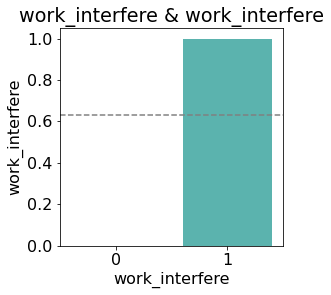


_____________________



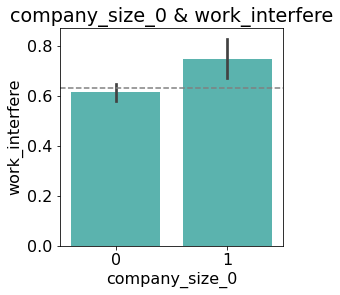


_____________________



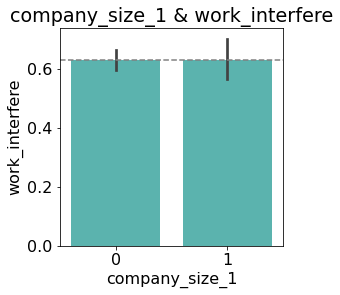


_____________________



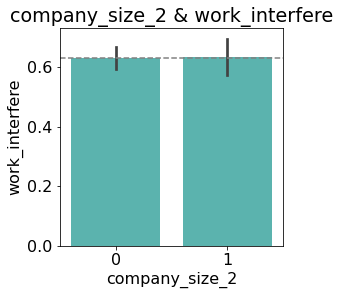


_____________________



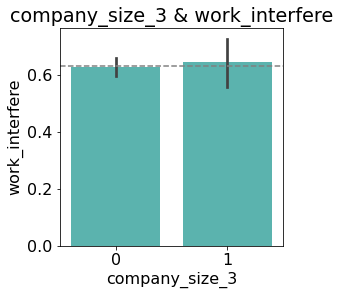


_____________________



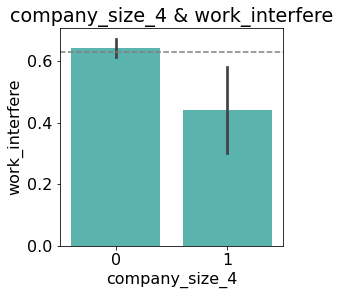


_____________________



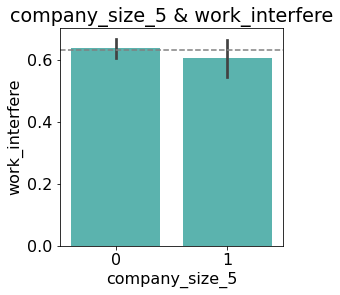


_____________________



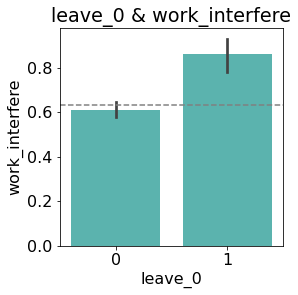


_____________________



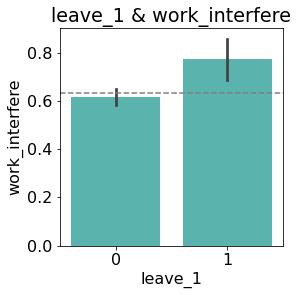


_____________________



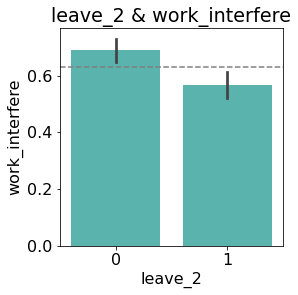


_____________________



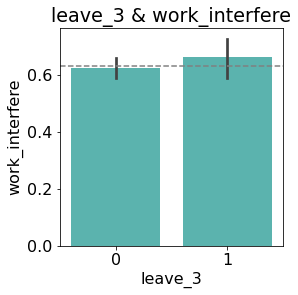


_____________________



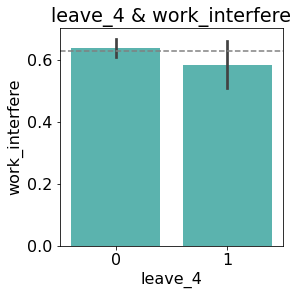


_____________________



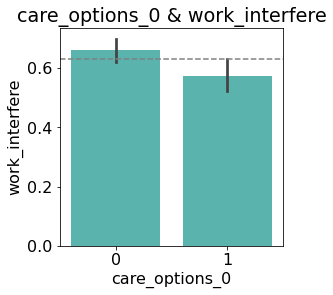


_____________________



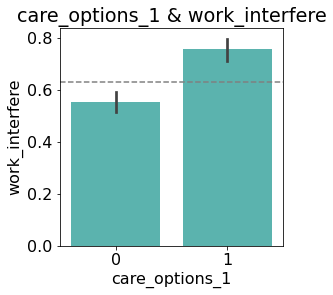


_____________________



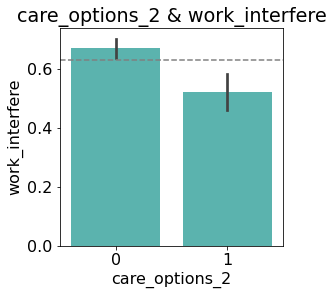


_____________________



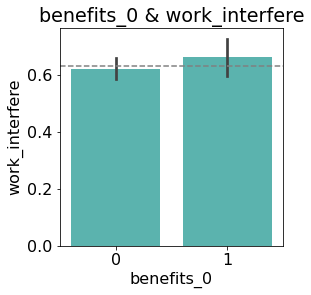


_____________________



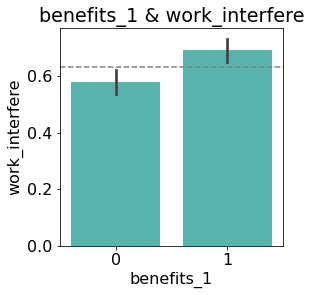


_____________________



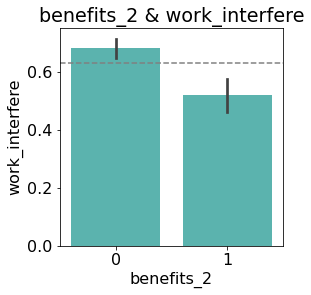


_____________________



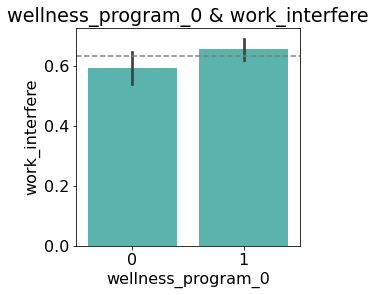


_____________________



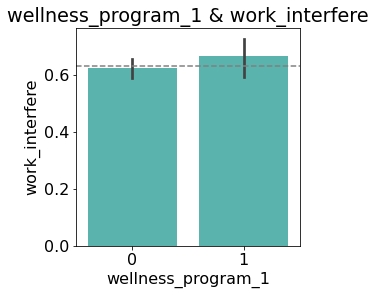


_____________________



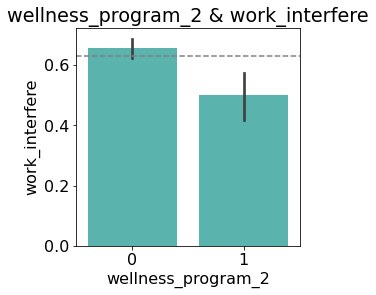


_____________________



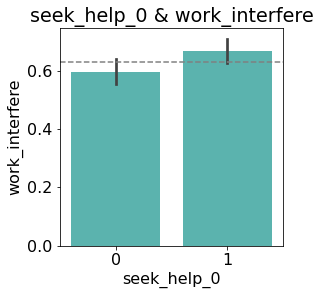


_____________________



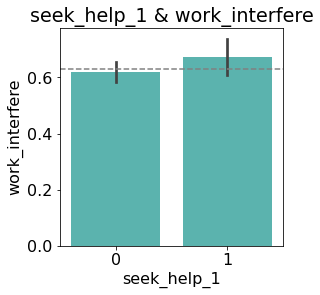


_____________________



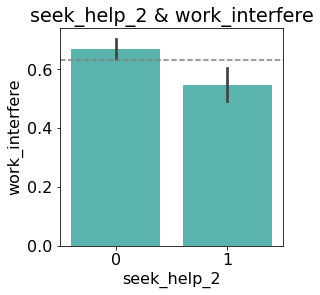


_____________________



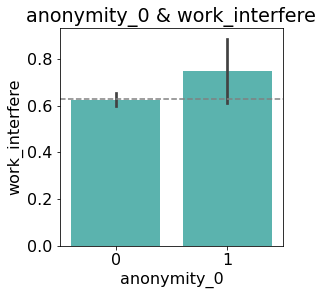


_____________________



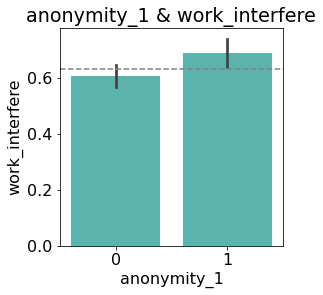


_____________________



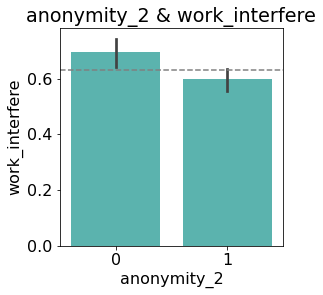


_____________________



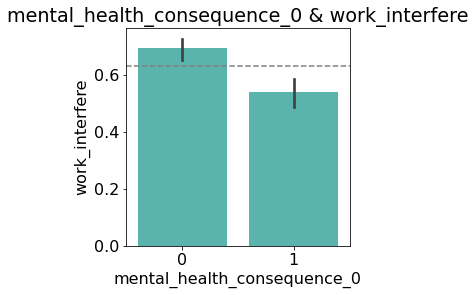


_____________________



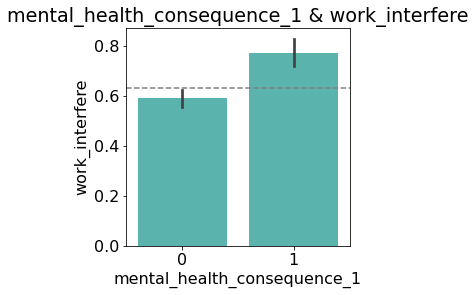


_____________________



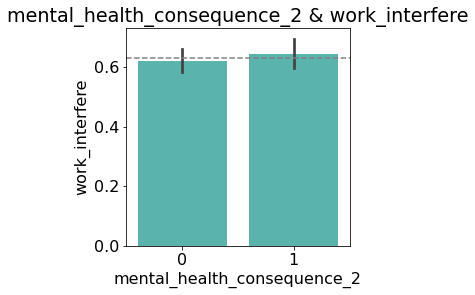


_____________________



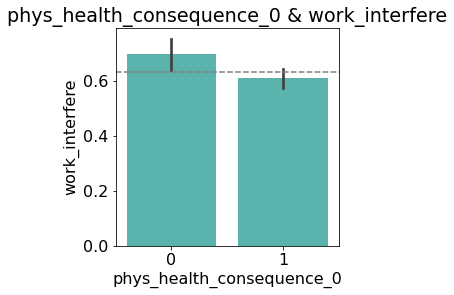


_____________________



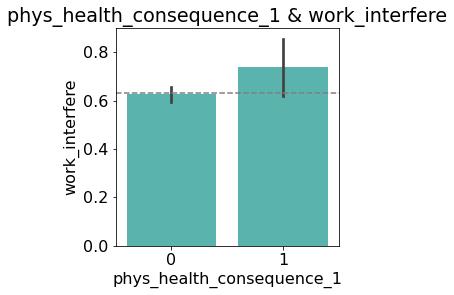


_____________________



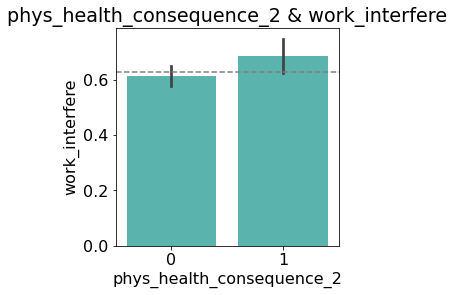


_____________________



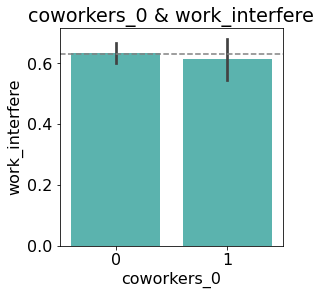


_____________________



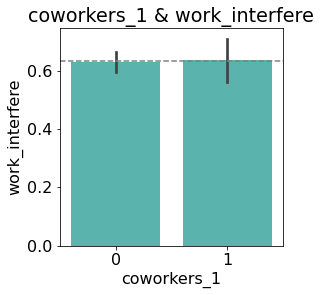


_____________________



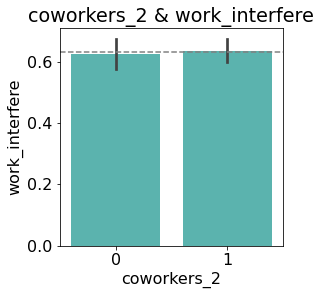


_____________________



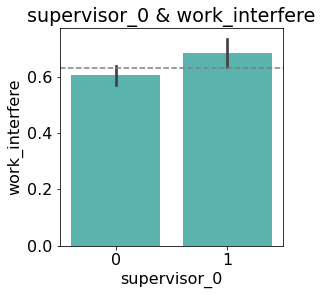


_____________________



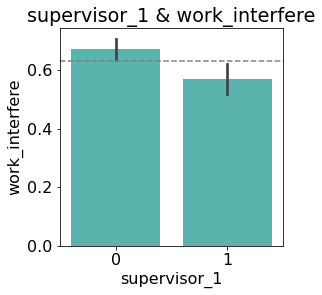


_____________________



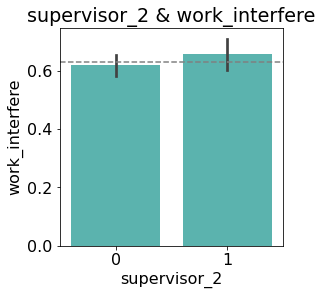


_____________________



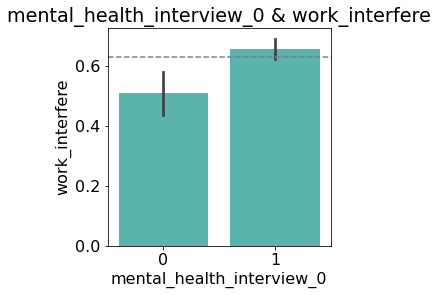


_____________________



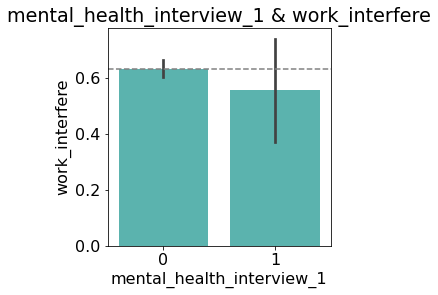


_____________________



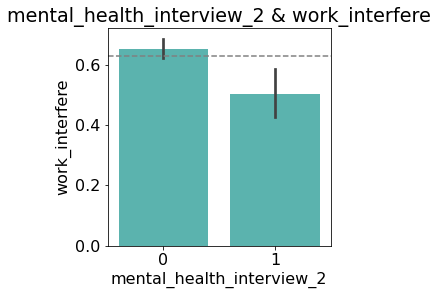


_____________________



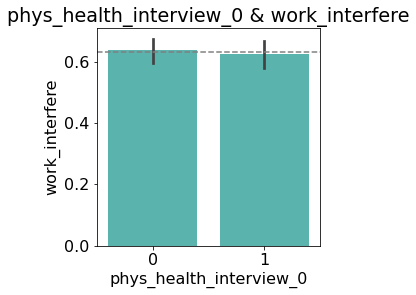


_____________________



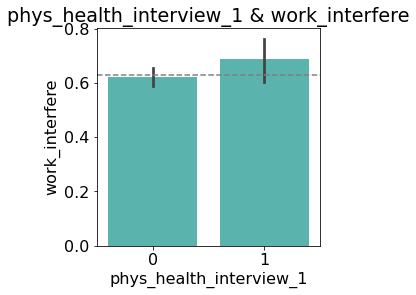


_____________________



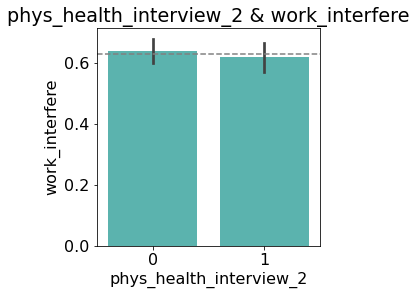


_____________________



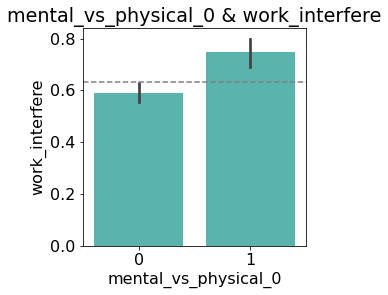


_____________________



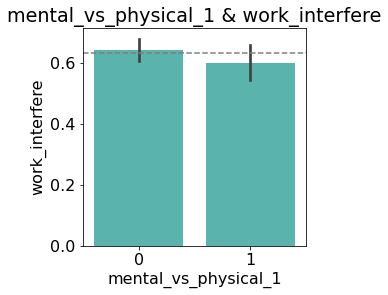


_____________________



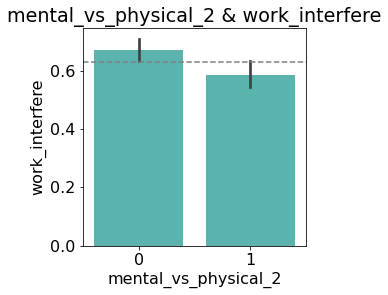


_____________________

                       variable    chi2  p-value  degrees of freedom
0                work_interfere  952.71   0.0000                 1.0
1   mental_health_consequence_0   22.80   0.0000                 1.0
2                       leave_0   17.75   0.0000                 1.0
3          mental_vs_physical_0   18.74   0.0000                 1.0
4                care_options_1   39.41   0.0000                 1.0
5   mental_health_consequence_1   22.96   0.0000                 1.0
6                    benefits_2   22.23   0.0000                 1.0
7                care_options_2   16.33   0.0001                 1.0
8                       leave_2   15.06   0.0001                 1.0
9            wellness_program_2   13.31   0.0003                 1.0
10                  seek_help_2   12.92   0.0003                 1.0
11    mental_health_interview_0   12.46   0.0004                 1.0
12                   benefits_1   12.37   0.0004                 1.0
13    ment

,variable,chi2,p-value,degrees of freedom
0,work_interfere,952.71,0.0000,1.0
1,mental_health_consequence_0,22.80,0.0000,1.0
2,leave_0,17.75,0.0000,1.0
3,mental_vs_physical_0,18.74,0.0000,1.0
4,care_options_1,39.41,0.0000,1.0
5,mental_health_consequence_1,22.96,0.0000,1.0
6,benefits_2,22.23,0.0000,1.0
7,care_options_2,16.33,0.0001,1.0
8,leave_2,15.06,0.0001,1.0
9,wellness_program_2,13.31,0.0003,1.0


In [23]:
tyler_explore.explore_bivariate_2nd(tyler_dummies, 'work_interfere', cat_vars=list(tyler_dummies.columns))

In [ ]:
tyler_dummies.head(1).T

In [ ]:
# data frame of categorical variables, with chi2 summary
mets

In [ ]:
# only returning those with 'p-value' < alpha
low_p = mets[mets['p-value']<0.05]
low_p

In [ ]:
# reordering based on chi2 score
top_drivers = low_p.sort_values('chi2', ascending=False)
top_drivers

In [ ]:
# let's look at what needs to be one-hot encoded
variables = list(top_drivers['variable'])
for var in variables:
    print(train[var].value_counts())

#### Bivariate Exploration - Key Findings, Takeaways, and Next Steps:
**Possible Strong Drivers (p-value <= 0.05, chi2 >)** 
- gender, family history, treatment, benefits, care options, wellness program, leave, mental health consequence, phys health consequence, supervisor, mental health interview, mental vs physical, obs consequence
- These variables all show 

**Worth Exploring Further**
- company size

### Looking into Company Size 4:

In [ ]:
train4 = train[train['company_size']==4]

In [ ]:
tyler_explore.explore_bivariate(train4, 'work_interfere')

In [ ]:
# list of the potential top drivers
made_the_cut = list(top_drivers['variable'][top_drivers['chi2']>10])

In [ ]:
# new dataframe to use for multivariate exploration
to_multi = train[made_the_cut]

In [ ]:
# quick peak...
to_multi = to_multi + train['age']